### External Sources and packages
Below cell lists the external dependencies of this notebook. I have utilized current well known third party libraries for generating graphs and charts:
1. matplotlib https://matplotlib.org
2. pandas dataframe https://pandas.pydata.org/

In [104]:
import base64
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

from pprint import pprint
from collections import Counter

print "all imports worked nicely"

all imports worked nicely


### Data Exploration
1. Parsing the file into a Pandas dataframe
2. Checking some of the values for individual columns - description, level and title
3. Getting all the possible values of column "level" 

In [34]:
# pd.set_option('display.max_colwidth', 100)
def read_data(file):
    df = pd.read_csv(file)
    df = df.drop('index', axis=1) # drop the indexing column as pandas already provides one
    print "Quick look into the data from %s" % file
    print df.head()
    print
    return df

In [79]:
# parse and read data
df_algo1 = read_data("search_results_s1.csv")
df_algo1.describe() # generate statistical information

quick look into the data from search_results_s1.csv
   search_results  rank
0               7     5
1               6     0
2               6     4
3               5     5
4               8     5



,search_results,rank
count,5000.000000,5000.000000
mean,7.001600,3.732200
std,2.648962,2.924892
min,0.000000,0.000000
25%,5.000000,0.000000
50%,7.000000,4.000000
75%,9.000000,6.000000
max,18.000000,15.000000


In [36]:
df_algo2 = read_data("search_results_s2.csv")
df_algo3 = read_data("search_results_s3.csv")
df_algo4 = read_data("search_results_s4.csv")
df_algo5 = read_data("search_results_s5.csv")

print "Statisctics for Algorithm 5"
df_algo5.describe() # generate statistical information

quick look into the data from search_results_s2.csv
   search_results  rank
0               4     4
1               2     0
2               3     0
3               5     3
4               3     1

quick look into the data from search_results_s3.csv
   search_results  rank
0               5     4
1               5     1
2               4     0
3               5     0
4               3     1

quick look into the data from search_results_s4.csv
   search_results  rank
0               8     5
1               7     4
2               6     4
3               8     0
4               7     0

quick look into the data from search_results_s5.csv
   search_results  rank
0               9     5
1              10     0
2               9     4
3               8     4
4               6     2

Statisctics for Algorithm 5


,search_results,rank
count,2000.000000,2000.000000
mean,6.932500,3.026000
std,2.751859,2.337104
min,0.000000,0.000000
25%,5.000000,1.000000
50%,7.000000,3.000000
75%,9.000000,5.000000
max,15.000000,11.000000


### Task 1:
Evaluate the given data to determine the “best”
algorithm.
1. Plot the query results based on the rank distribution - higher the zero rank count, worse the algorithm

2. Plot the query results with zero ranks(% distribution), implying no relevant result was returned. This gives us first hint of algorithm efficiency by ranking them in terms of no relevant results returned.

3. Plot the results with non zero ranks: here we try to plot the difference in (number of results - rank), ***the higher this number the better the algorithm***. (Note: we remove zero rank results first to calculat this difference) 

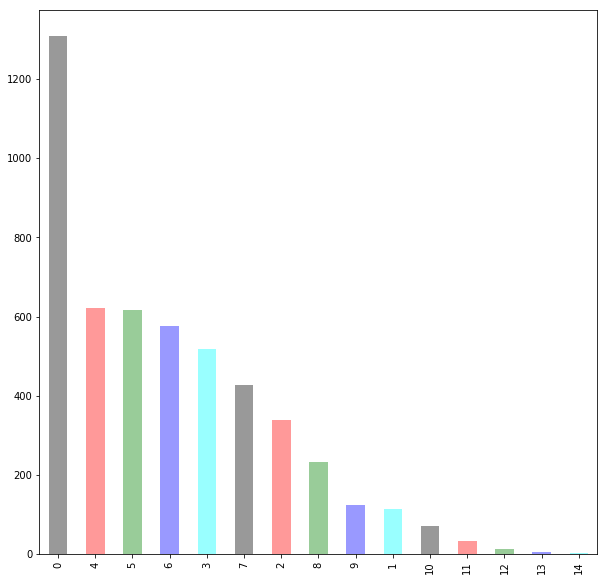

In [45]:
# a function to plot the ranks values for each algorithm
def plot_ranks(df):
    counts = df["rank"].value_counts()
    plot_data_ranks = df[df["rank"].isin(counts[counts >= 2].index)] # showing only those rank values whose occurence is more than or equal to 2
    plot_data_ranks["rank"].value_counts().plot.bar(y="level", figsize=(10,10),alpha = 0.4, color=['black', 'red', 'green', 'blue', 'cyan'])

plot_ranks(df_algo1)

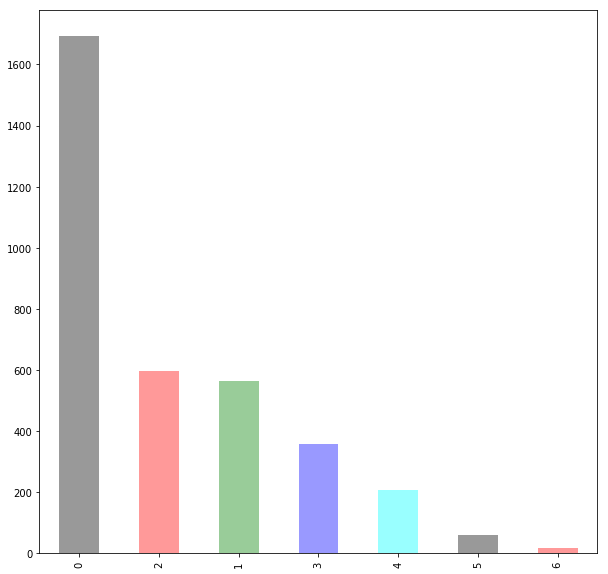

In [46]:
plot_ranks(df_algo2)

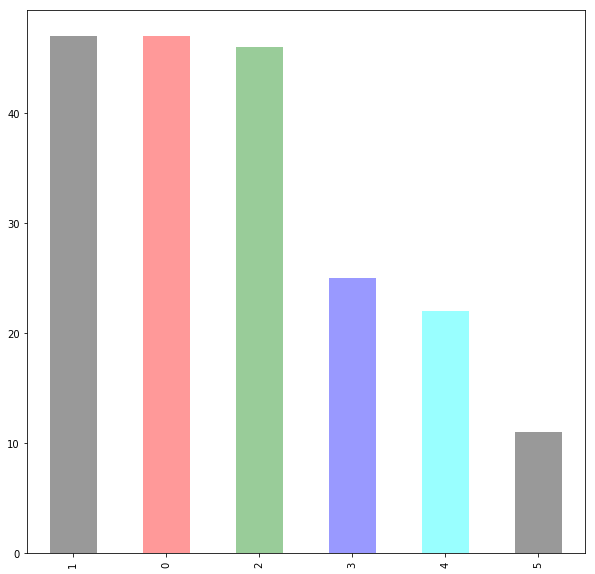

In [47]:
plot_ranks(df_algo3)

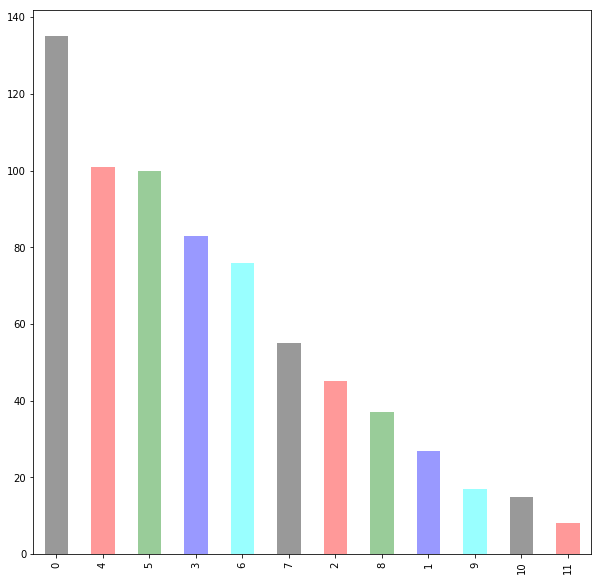

In [48]:
plot_ranks(df_algo4)

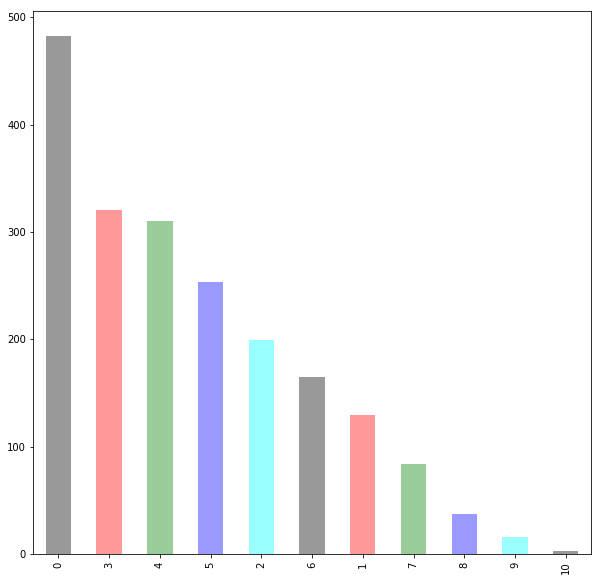

In [49]:
plot_ranks(df_algo5)

In [54]:
def count_zero_rank(df):
    algo_rank_list = df["rank"].tolist() # getting ranks in list and extracting the count of 0 ranks
    zero_count = float(algo_rank_list.count(0))/(len(algo_rank_list)) # normalized count of zero rank results
    return zero_count

In [58]:
# list that keeps zero rank counts for each algorithm
count_zero = []

for df in [df_algo1, df_algo2, df_algo3, df_algo4, df_algo5]:
    count_zero.append(count_zero_rank(df))

print count_zero
algo_name = ["algo_1","algo_2","algo_3","algo_4","algo_5"]
print algo_name

[0.2616, 0.484, 0.235, 0.19285714285714287, 0.241]
['algo_1', 'algo_2', 'algo_3', 'algo_4', 'algo_5']


/home/dupree/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Zero Rank Frequency')

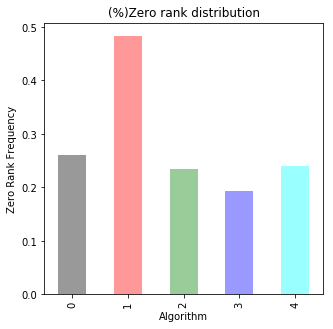

In [71]:
freq_series = pd.Series.from_array(count_zero)
opacity = 0.4
# Plot the figure.
plt.figure(figsize=(5, 5))
ax = freq_series.plot(kind='bar', alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
ax.set_title('(%)Zero rank distribution')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Zero Rank Frequency')


### Inference
The above chart shows that **Algorithm indexed at 1**(search_results_s2.csv) has highest zero rank results making it the **worst** in this metric, while **Algorithm indexed at 3**(search_results_s3.csv) being the **best**. 

In [98]:
# function to remove zero count values from rank column
# add rank_difference column that keeps track of metric = search_results - rank
# the higher this metric the better algorithm

def transform_df(df_input):
    df = df_input.query('rank != 0')
    df['rank_difference'] = df.apply(lambda row: row['search_results'] - row['rank'], axis=1)
    return df

# a function to plot the rank_difference values for each algorithm
def plot_rank_diff(df):
    counts = df["rank_difference"].value_counts()
    plot_data_ranks = df[df["rank_difference"].isin(counts[counts >= 2].index)] # showing only those rank values whose occurence is more than or equal to 2
    plot_data_ranks["rank_difference"].value_counts().plot.bar(y="level", figsize=(5,5),alpha = 0.4, color=['black', 'red', 'green', 'blue', 'cyan'])


/home/dupree/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


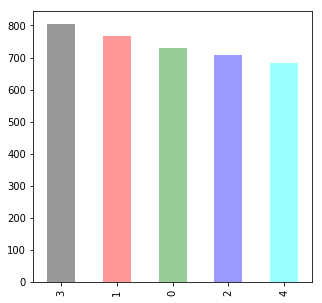

In [99]:
# Transforming the df for each algorithm and plotting the ranks
plot_rank_diff(transform_df(df_algo1))


/home/dupree/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


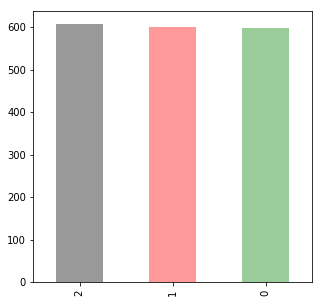

In [100]:
# Transforming the df for each algorithm and plotting the ranks
plot_rank_diff(transform_df(df_algo2))

/home/dupree/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


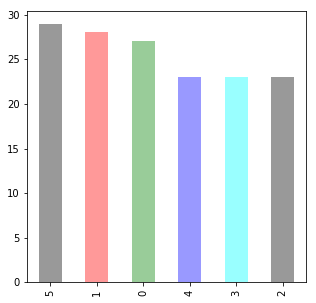

In [101]:
# Transforming the df for each algorithm and plotting the ranks
plot_rank_diff(transform_df(df_algo3))


/home/dupree/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


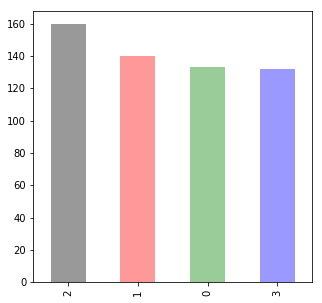

In [102]:
# Transforming the df for each algorithm and plotting the ranks
plot_rank_diff(transform_df(df_algo4))


/home/dupree/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


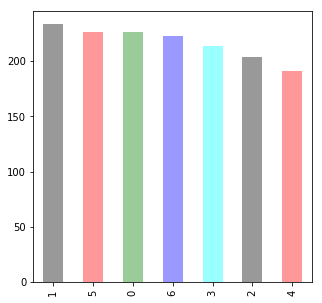

In [103]:
# Transforming the df for each algorithm and plotting the ranks
plot_rank_diff(transform_df(df_algo5))


### Inference 2
1. As it can be seen in plots above, ***algorithm 3*** shows the highest distribution of difference in (search results - rank) thus implying it performing better compared to others.
2. ***NOTE***: Ideally the plots **should show % data thus removing the affect of difference in query amount** in each data set. Due to shortage of time I am not able to incorporate this in solution.

### Inference 3

1. As one of the metrics we can use mean values of the clicked link(rank column).
2. We expect the 1st link to be the most relevant and relevance of the links should decrease. 
3. Smarter methods could be used if any information about the user interface would be available, e.g. number of shown
4. links for the user as rarely later search results' pages are visited by most of the users 

5. **Higher results --> worse performance**

In [105]:
print("Engine 1:", transform_df(df_algo1)['rank'].mean())
print("Engine 2:", transform_df(df_algo2)['rank'].mean()) 
print("Engine 3:", transform_df(df_algo3)['rank'].mean())
print("Engine 4:", transform_df(df_algo4)['rank'].mean())
print("Engine 5:", transform_df(df_algo5)['rank'].mean())

/home/dupree/anaconda2/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


('Engine 1:', 5.054442036836403)
('Engine 2:', 2.256921373200443)
('Engine 3:', 2.4248366013071894)
('Engine 4:', 4.9734513274336285)
('Engine 5:', 3.986824769433465)


### Task 2:
● How to determine whether two words or
phrases are synonyms?
1. Using keyword similarity - TF/IDF based methods
2. Using semantic similarity - word embedding based methods


● In general, how do you find relationships
to use for query expansion?
1. Take out the keywords from query using POS, NER techniques or parsing over of list of important domain specific keyowrds.
2. Once done query can be expanded to accomodate keywords "similar" to extracted keywords based on any of the methods described in question above. 

● What are the trade-offs between using
click-through rate (CTR) and conversion
rate as search success metrics? ! ​

1. If I understand correctly, CTR should tell us that if the search result was inspected by the user or not.
2. Conversion rate(i.e the rate of actual hiring happening), captures more than the search efficiency. It reflects the efficiency of the whole process of recuritment, if I understnad correctly. 
3. In my understanding CTR should be a good measure of search results. But maybe I need to clarify these concepts in more detail.

### Task 3:
●Tell us about an aspect of search you are most interested in?
1. I am highly interested in improving the search results for **natural language queries**, which means parsing unstructured query data, extracting the relevant important search terms and then searching and expanding the query based on those search terms.

2. **Semantic search** - This is something which I already mentioned in step 1, expanding query search by just not matching keywords but also looking for semantically similar terms based on search terms.

3. Step 2 above can also incorporate for improvements such as **typo correction**.

**PS** : Due to time constraints, I could not expand more here. But I really enjoyed the task, hoping you enjoy the submission as well.  